# Covariance Exploration

want to basically understand what transforming a vector by a covariance matrix does geometrically

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_points(x, y, title="Plot"):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    ax.set_aspect('equal', adjustable='box')

    lim = max(np.abs(x).max(), np.abs(y).max()) * 1.3
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    plt.show()

In [ ]:
def plot_vectors(vectors, colors=None, labels=None, title="Vector Plot"):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.set_aspect('equal', adjustable='box')

    if colors is None:
        colors = ['red', 'blue', 'green']
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    for (vx, vy), c, label in zip(vectors, colors, labels):
        ax.arrow(0, 0, vx, vy, head_width=0.05, head_length=0.07,
                 fc=c, ec=c, linewidth=2, label=label)

    all_x = [v[0] for v in vectors]
    all_y = [v[1] for v in vectors]
    lim = max(max(map(abs, all_x)), max(map(abs, all_y))) * 1.5
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    plt.legend()
    plt.show()


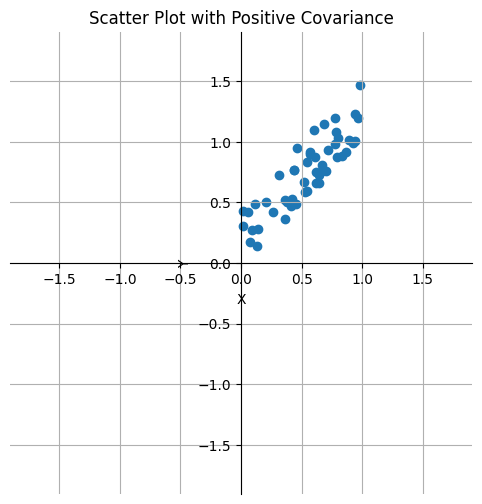

In [ ]:
np.random.seed(0)
x = np.random.rand(50)
y = x + np.random.rand(50) * 0.5  # add some noise

plot_points(x, y, 'Scatter Plot with Positive Covariance')

In [ ]:
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

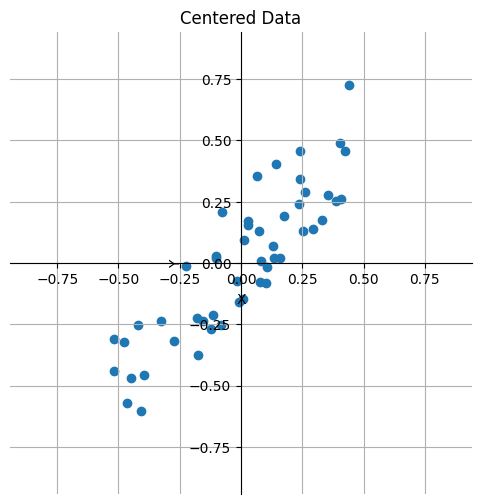

In [ ]:
plot_points(x_centered, y_centered, "Centered Data")

In [ ]:
X = np.vstack((x_centered, y_centered)).T

In [ ]:
X.shape

(50, 2)

In [ ]:
cov = X.T @ X * 1/49

In [ ]:
cov

array([[0.07564151, 0.07209614],
       [0.07209614, 0.08988046]])

In [ ]:
var_x = cov[0][0]
var_y = cov[1][1]

cov_xy = cov[0][1]
corr_xy = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))

In [ ]:
print(f"var(x):     {var_x}")
print(f"var(y):     {var_y}")
print(f"cov(x, y):  {cov_xy}")
print(f"corr(x, y): {corr_xy}")

var(x):     0.07564150850129776
var(y):     0.08988046194303648
cov(x, y):  0.07209614320350674
corr(x, y): 0.874378145386772


var(x): how much the data spreads away from the mean in the x direction \
var(y): how much the data spreads away from the mean in the y direction

cov(x, y): represents how x and y move with respect to each other
corr(x, y): actually represents strength because it's normalized between [-1, 1]

in this case, seems like the data doesn't spread much across either access (low individual variances)

also covariance is positive which means both variables grow/shrink in same direction

high correlation which means they both grow at a steady and close to equal rate

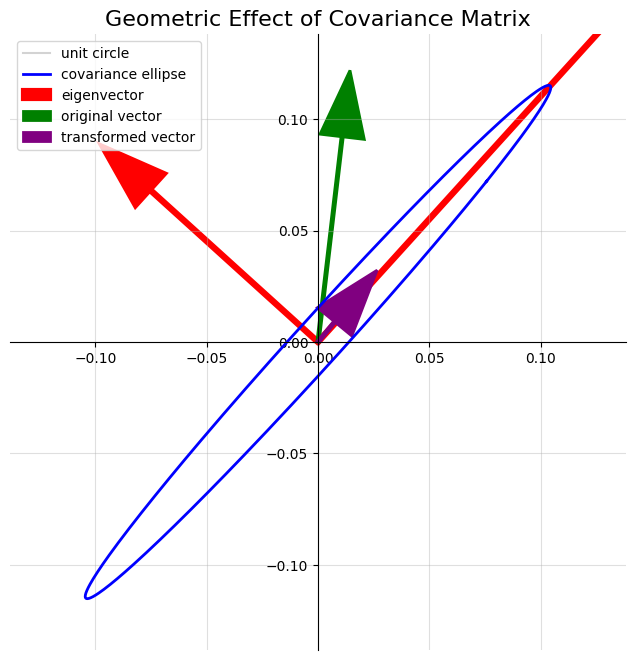

In [ ]:
v = np.array([x_centered[0], y_centered[0]])
v_transformed = cov @ v

eigvals, eigvecs = np.linalg.eigh(cov)

order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

theta = np.linspace(0, 2*np.pi, 300)
circle = np.vstack([np.cos(theta), np.sin(theta)])  # shape (2, 300)

ellipse = cov @ circle

plt.figure(figsize=(8, 8))
plt.title("Geometric Effect of Covariance Matrix", fontsize=16)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.4)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

plt.plot(circle[0], circle[1], color='lightgray', label='unit circle')

plt.plot(ellipse[0], ellipse[1], color='blue', linewidth=2, label='covariance ellipse')

for i in range(2):
    eigvec = eigvecs[:, i]
    length = np.sqrt(eigvals[i])
    plt.arrow(0, 0,
              eigvec[0]*length,
              eigvec[1]*length,
              head_width=0.02,
              head_length=0.03,
              color='red',
              linewidth=3,
              label='eigenvector' if i == 0 else None)

plt.arrow(0, 0, v[0], v[1],
          head_width=0.02, head_length=0.03,
          color='green', linewidth=2, label='original vector')

plt.arrow(0, 0, v_transformed[0], v_transformed[1],
          head_width=0.02, head_length=0.03,
          color='purple', linewidth=2, label='transformed vector')

max_val = np.max(np.abs(ellipse)) * 1.2
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)

plt.legend(loc='upper left')
plt.show()